In [117]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C
from sklearn.cluster import KMeans
import scipy.io as spio
%matplotlib inline

New package:
allows to simulate heteroscedastic noise level (https://github.com/jmetzen/gp_extras)

In [118]:
from gp_extras.kernels import HeteroscedasticKernel

Training sample:
M.The motorcycle dataset from (Silverman, 1985),
consisting of 133 of accelerometer readings through
time following a simulated motorcycle crash during an
experiment to determine the efficacy of crash-helmets.

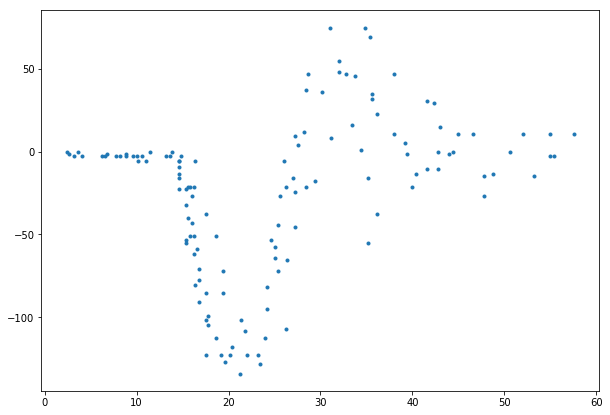

In [119]:
data = spio.loadmat('motorcycle.mat', squeeze_me=True)
y = data['y']
X = data['X']
plt.figure(figsize=(10, 7))
plt.plot(X, y, '.')

Сustomizing two regression models

In [122]:
# Gaussian Process with RBF kernel and homoscedastic noise level
kernel_homo = C(1.0, (1e-10, 1000)) * RBF(1, (1, 100.0)) + WhiteKernel(1, (100, 5000.0))
gp_homoscedastic = GaussianProcessRegressor(kernel=kernel_homo, alpha=0)
gp_homoscedastic.fit(X[:, np.newaxis], y)


# Gaussian Process with RBF kernel and heteroscedastic noise level
prototypes = KMeans(n_clusters=10).fit(X[:, np.newaxis]).cluster_centers_
kernel_hetero = C(1.0, (1e-10, 1000)) * RBF(1, (1, 100.0)) \
    + HeteroscedasticKernel.construct(prototypes, 1, (150, 5000.0),
                                      gamma=5.0, gamma_bounds="fixed")
gp_heteroscedastic = GaussianProcessRegressor(kernel=kernel_hetero, alpha=0)
gp_heteroscedastic.fit(X[:, np.newaxis], y)



X_ - new the sample by which the function graph will be constructed

In [ ]:
X_ = np.linspace(0, 60, 100)

Drawing approximation charts

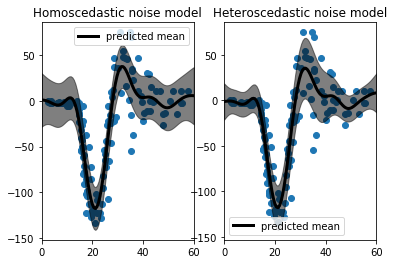

In [121]:
plt.subplot(1, 2, 1)
plt.scatter(X, y)

y_mean, y_std = gp_homoscedastic.predict(X_[:, None], return_std=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9, label="predicted mean")
plt.fill_between(X_, y_mean - y_std, y_mean + y_std, alpha=0.5, color='k')
plt.xlim(0, 60)
plt.legend(loc="best")
plt.title("Homoscedastic noise model")




plt.subplot(1, 2, 2)
plt.scatter(X, y)

y_mean, y_std = gp_heteroscedastic.predict(X_[:, None], return_std=True)
plt.plot(X_, y_mean, 'k', lw = 3, zorder = 9, label="predicted mean")
plt.fill_between(X_, y_mean - y_std, y_mean + y_std, alpha = 0.5, color='k')
plt.xlim(0, 60)
plt.legend(loc="best")
plt.title("Heteroscedastic noise model")
plt.show()
